In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import brier_score_loss, roc_auc_score
from sklearn.calibration import calibration_curve, CalibratedClassifierCV

import warnings
warnings.filterwarnings("ignore")

In [15]:
datasets_ls = pd.read_excel("dados2.xlsx")
df = datasets_ls

In [16]:
X = df.drop(['Flag_apo_anul', 'NIF'], axis=1)
y = df['Flag_apo_anul']


X_train, X_test, y_train, y_test = train_test_split(
X,  # drop the target
y,  # just the target
test_size=0.3,
random_state=0)

X_train.shape, X_test.shape

((699, 45), (300, 45))

In [17]:
rf = RandomForestClassifier(
    n_estimators=100, random_state=0, max_depth=2).fit(X_train, y_train)

# score the test set
probs = rf.predict_proba(X_test)[:, 1]

In [18]:
print('roc-auc on train set: ', roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1]))
print('roc-auc on test set: ', roc_auc_score(y_test, probs))

roc-auc on train set:  0.9056877811094454
roc-auc on test set:  0.7301587301587302


In [19]:
print('Brier Score on train set: ', brier_score_loss(y_train, rf.predict_proba(X_train)[:, 1]))
print('Brier Score on test set: ', brier_score_loss(y_test, probs))

Brier Score on train set:  0.040017256176049704
Brier Score on test set:  0.020108541114522527


In [40]:
def plot_calibration_curve(y_true, probs, bins, strategy):

    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_true, probs, n_bins=bins, strategy=strategy)
    
    max_val = max(mean_predicted_value)
    
    plt.figure(figsize=(8,10))
    plt.subplot(2, 1, 1)
    plt.plot(mean_predicted_value, fraction_of_positives, label='Random Forests')
    plt.plot(np.linspace(0, max_val, bins), np.linspace(0, max_val, bins),
         linestyle='--', color='red', label='Perfect calibration')
    
    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of positive examples')
    plt.title('Calibration Curve')
    plt.legend(loc='upper left')


    plt.subplot(2, 1, 2)
    plt.hist(probs, range=(0, 1), bins=bins, density=True, stacked=True, alpha=0.3)
    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of examples')
    plt.title('Density')
    plt.show()

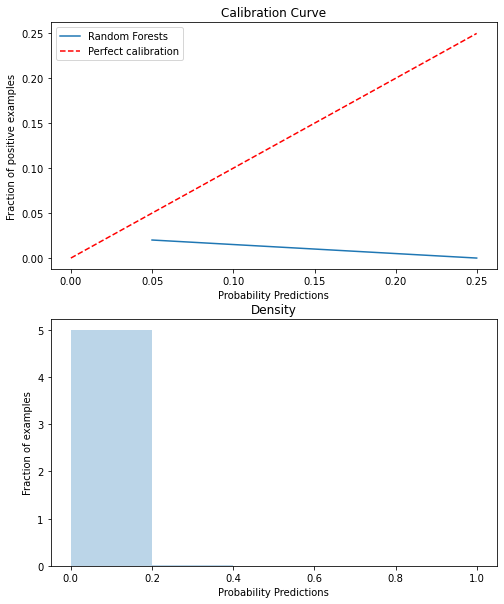

In [41]:
plot_calibration_curve(y_test, probs, bins=5, strategy='uniform')

# Probability Re-Calibration

In [22]:
# Isotonic calibration

clf_isotonic = CalibratedClassifierCV(rf, cv=5, method='isotonic')
clf_isotonic.fit(X_test, y_test)
prob_isotonic = clf_isotonic.predict_proba(X_test)[:, 1]

# Gaussian Naive-Bayes with sigmoid calibration
clf_sigmoid = CalibratedClassifierCV(rf, cv=5, method='sigmoid')
clf_sigmoid.fit(X_test, y_test)
prob_sigmoid = clf_sigmoid.predict_proba(X_test)[:, 1]

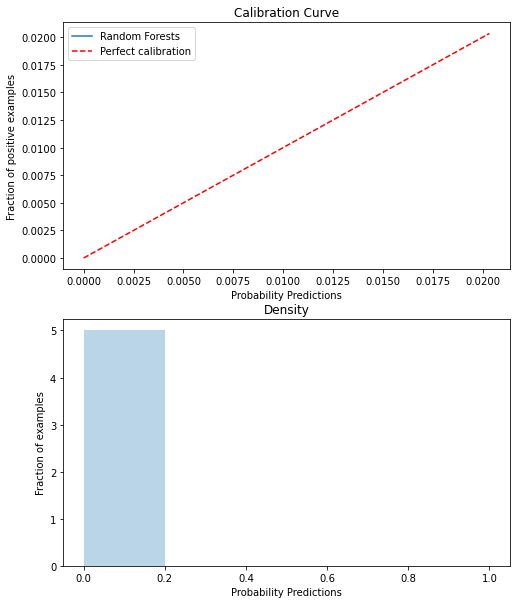

In [23]:
plot_calibration_curve(y_test, prob_isotonic, bins=5, strategy='uniform')

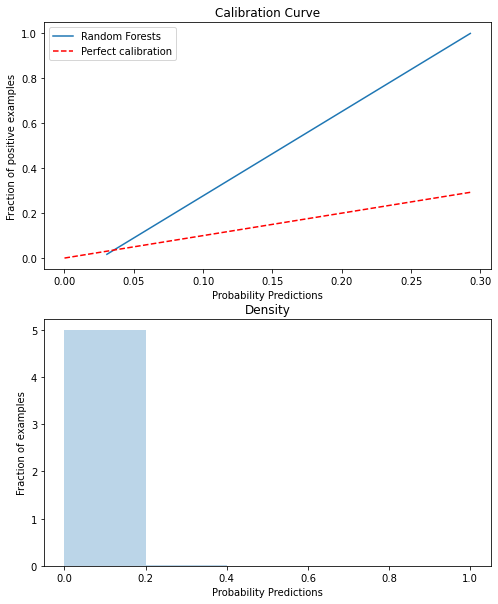

In [24]:
plot_calibration_curve(y_test, prob_sigmoid, bins=5, strategy='uniform')